In [1]:
import os
import pandas as pd
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")
# Chargement des données
A = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_AUTOS",index_col=0)
display(A)

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4
Modele,,,,,,,,
GOLF,75,421,149,1217,143,Europe,Diesel,non
CITRONC4,138,426,146,1381,142,France,Diesel,non
P607,204,491,145,1723,223,France,Diesel,non
VELSATIS,150,486,158,1735,188,France,Diesel,non
CITRONC2,61,367,147,932,141,France,Essence,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non
AUDIA3,102,421,143,1205,168,Europe,Essence,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non


In [2]:
B = pd.DataFrame([136,446,168,1520,190,"Autres","Diesel","oui"],index=A.columns,columns=["X-TRAIL"]).T
C  = pd.DataFrame({
    "prix" : [19140,23400,40550,38250,10700,54900,21630,29990,27400,27990],
    "surtaxe" : ["non","non","oui","oui","non","oui","non","oui","oui","oui"]
},index=A.index)
D = pd.concat([pd.concat([A,B],axis=0),C],axis=1)
D

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4,prix,surtaxe
GOLF,75,421,149,1217,143,Europe,Diesel,non,19140.0,non
CITRONC4,138,426,146,1381,142,France,Diesel,non,23400.0,non
P607,204,491,145,1723,223,France,Diesel,non,40550.0,oui
VELSATIS,150,486,158,1735,188,France,Diesel,non,38250.0,oui
CITRONC2,61,367,147,932,141,France,Essence,non,10700.0,non
CHRYS300,340,502,148,1835,291,Autres,Essence,non,54900.0,oui
AUDIA3,102,421,143,1205,168,Europe,Essence,non,21630.0,non
OUTLAND,202,455,167,1595,237,Autres,Diesel,oui,29990.0,oui
PTCRUISER,223,429,154,1595,235,Autres,Essence,non,27400.0,oui
SANTA_FE,125,450,173,1757,197,Autres,Diesel,oui,27990.0,oui


In [3]:
for col in ['puissance','longueur','hauteur','poids',"CO2","prix"]:
    D[col] = D[col].astype("float")

In [4]:
from scientisttools.decomposition import FAMD
#instaciation
afdm = FAMD(n_components = None,
            row_labels=D.index[:-1],
            row_sup_labels=[D.index[-1]], 
            quanti_labels=['puissance','longueur','hauteur','poids',"CO2"],
            quanti_sup_labels=['prix'],
            quali_labels=['origine','carburant',"4X4"],
            quali_sup_labels=['surtaxe'],
            parallelize=False).fit(D)

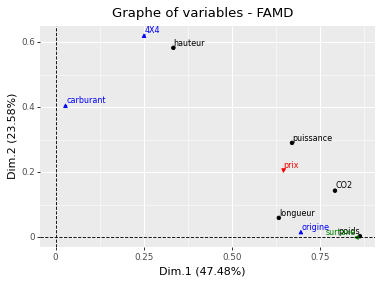

In [5]:
from scientisttools.ggplot import fviz_famd_var
p = fviz_famd_var(afdm,repel=True)
print(p)

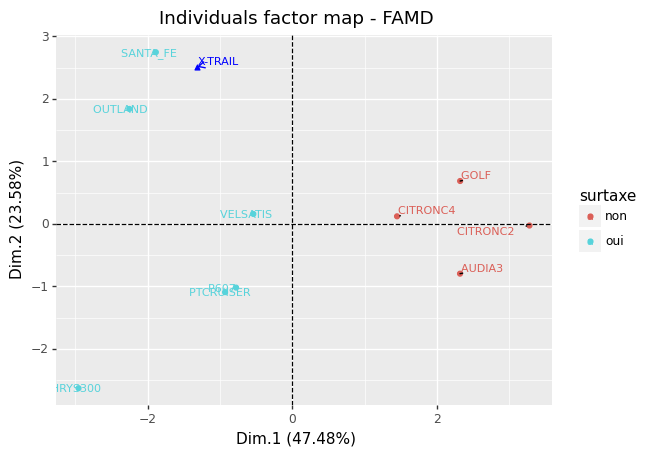

In [6]:
from scientisttools.ggplot import fviz_famd_ind
p = fviz_famd_ind(afdm,color="puissance",habillage="surtaxe",repel=True)
print(p)

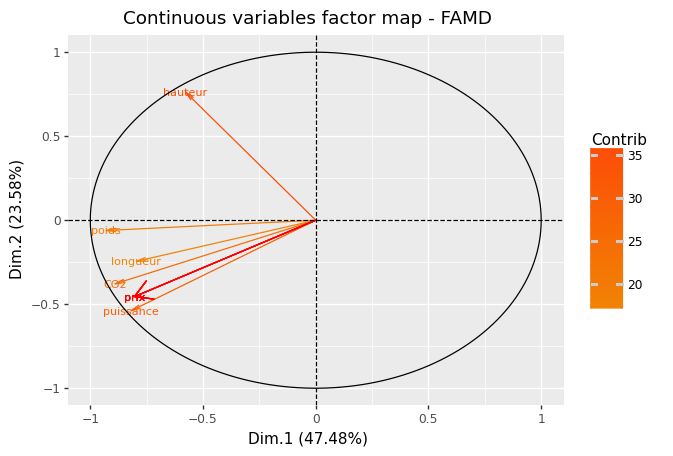

In [7]:
from scientisttools.ggplot import fviz_famd_col
p = fviz_famd_col(afdm,color="contrib")
print(p)

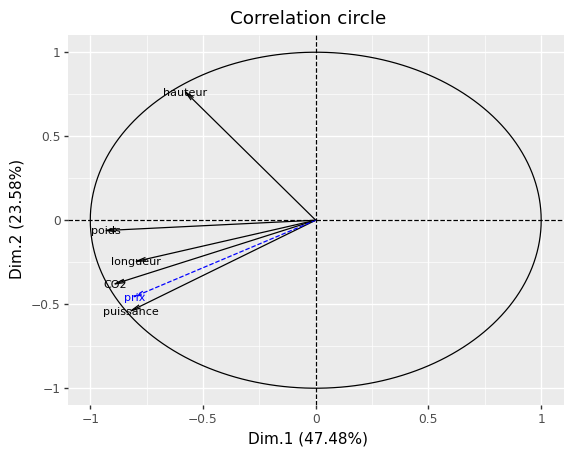

In [8]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(afdm)
print(p)

In [9]:
afdm.chi2_sup_test_


{'statistic':           origine  carburant       4X4
 surtaxe  5.833333        0.0  0.234375,
 'pvalue':           origine  carburant       4X4
 surtaxe  0.054114        1.0  0.628299}

In [10]:
from scientisttools.extractfactor import summaryFAMD
summaryFAMD(afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |   Dim.9 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| Variance                |   4.273 |   2.122 |   1.439 |   0.836 |   0.164 |   0.114 |   0.034 |   0.016 |   0.002 |
| Difference              |   2.151 |   0.683 |   0.602 |   0.672 |   0.05  |   0.081 |   0.018 |   0.014 |   0.002 |
| % of var.               |  47.479 |  23.577 |  15.986 |   9.293 |   1.823 |   1.272 |   0.374 |   0.176 |   0.022 |
| Cumulative of % of var. |  47.479 |  71.056 |  87.042 |  96.335 |  98.157 |  99.429 |  99.803 |  99.978 | 100     |

Individuals (the 10 first)

|           |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:----------|---------:|--